/var/folders/2h/yq66pk6517xbj3ltp9rn__4h0000gn/T/ipykernel_13595/1692589725.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])


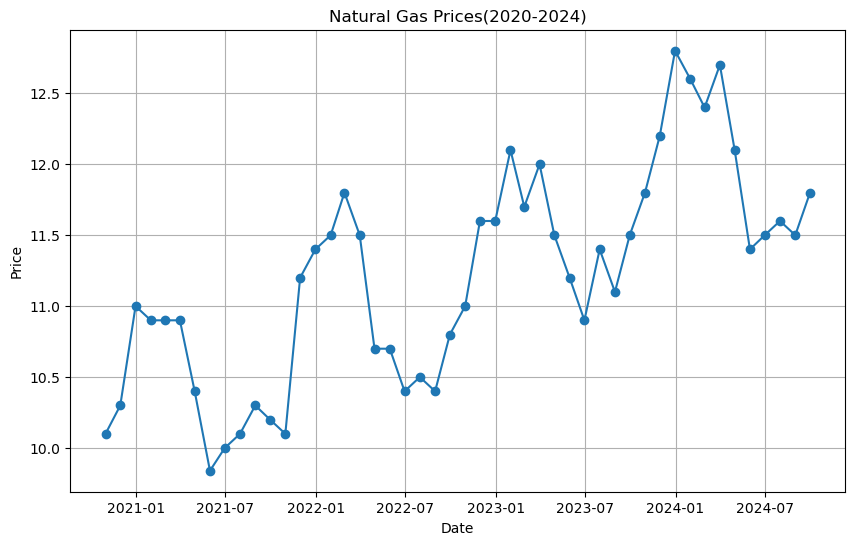

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])

plt.figure(figsize=(10, 6))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-')
plt.title('Natural Gas Prices(2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [3]:
import numpy as np
from datetime import date, timedelta

# 1. Convert dates into numbers (days from start) so we can do math on them
df['Days_From_Start'] = (df['Dates'] - df['Dates'].min()).dt.days

# 2. Find the "Trend Line" (Linear Regression)
# We use numpy to fit a straight line through the data
# z[0] is the slope (how much price increases per day), z[1] is the intercept
z = np.polyfit(df['Days_From_Start'], df['Prices'], 1)
trend_func = np.poly1d(z)

# 3. Find the "Seasonality" (The Wavy Pattern)
# We calculate how much the actual price differs from the trend line for each month
df['Trend_Price'] = trend_func(df['Days_From_Start'])
df['Seasonal_Deviation'] = df['Prices'] - df['Trend_Price']

# Group by month to get the average "adder" for January, February, etc.
df['Month'] = df['Dates'].dt.month
seasonal_adjustments = df.groupby('Month')['Seasonal_Deviation'].mean()

# 4. Create the Prediction Function
def get_price_estimate(input_date):
    # Convert input date to "days from start"
    start_date = df['Dates'].min()
    days_input = (input_date - start_date).days
    
    # Calculate the base trend price
    trend_price = trend_func(days_input)
    
    # Add the seasonal adjustment for that specific month
    month_index = input_date.month
    seasonality = seasonal_adjustments[month_index]
    
    return trend_price + seasonality

# Let's test it! Predict the price for a date one year in the future
test_date = pd.Timestamp('2025-12-31')
estimated_price = get_price_estimate(test_date)

print(f"Trend Slope: Prices increase about ${z[0]*365:.2f} per year")
print(f"Estimated Price for {test_date.date()}: ${estimated_price:.2f}")

Trend Slope: Prices increase about $0.47 per year
Estimated Price for 2025-12-31: $13.34
